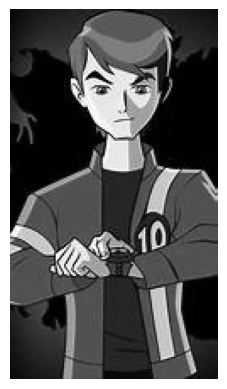

(219, 123, 3)

In [1]:
import cv2 as c
import matplotlib.pyplot as plt 
import numpy as np
img=c.imread("leo.jpg")
img_rgb=c.cvtColor(img,c.COLOR_BGR2GRAY)
plt.imshow(img_rgb,cmap="gray")
plt.axis("off")
plt.show()
img.shape

In [3]:
def bright_dim(img,x):
    h,w=img.shape
    img2=np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            img2[i,j]=np.clip(img[i,j]+x,0,255)
    return img2            

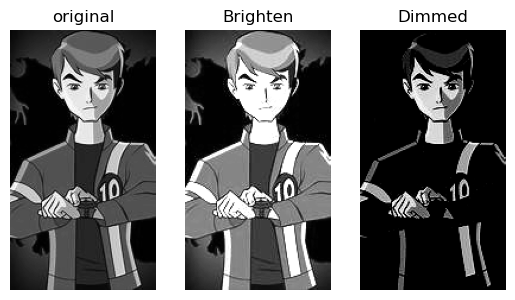

In [5]:
bright_img=bright_dim(img_rgb,100)
dim=bright_dim(img_rgb,-100)
plt.subplot(1,3,1)
plt.imshow(img_rgb,cmap="gray")
plt.axis("off")
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(bright_img,cmap="gray")
plt.axis("off")
plt.title("Brighten")
plt.subplot(1,3,3)
plt.imshow(dim,cmap="gray")
plt.axis("off")
plt.title("Dimmed")
plt.show()

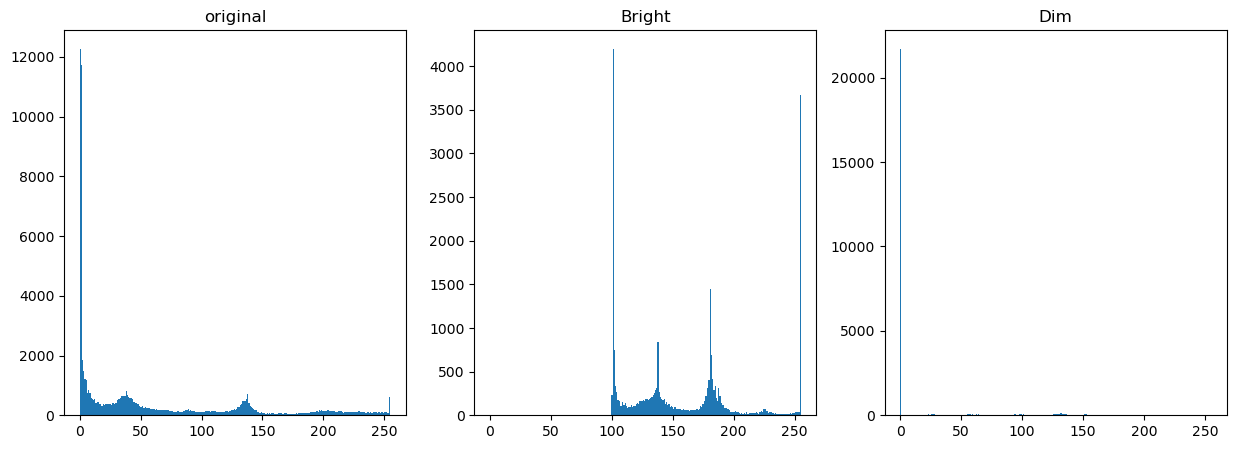

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(img.ravel(),bins=256,range=(0,255))
plt.title("original")
plt.subplot(1,3,2)
plt.hist(bright_img.ravel(),bins=256,range=(0,255))
plt.title("Bright")
plt.subplot(1,3,3)
plt.hist(dim.ravel(),bins=256,range=(0,255))
plt.title("Dim")
plt.show()

In [7]:
img_eq=c.equalizeHist(img_rgb)

In [9]:
def DFT(img):
    dft=np.fft.fft2(img)
    dft_shift=np.fft.fftshift(dft)
    mg=20*np.log(np.abs(dft_shift))
    return mg

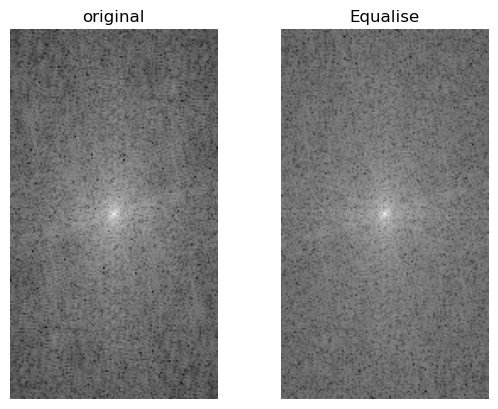

In [10]:
original=DFT(img_rgb)
equalise=DFT(img_eq)
plt.subplot(1,2,1)
plt.imshow(original,cmap="gray")
plt.axis("off")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(equalise,cmap="gray")
plt.axis("off")
plt.title("Equalise")
plt.show()

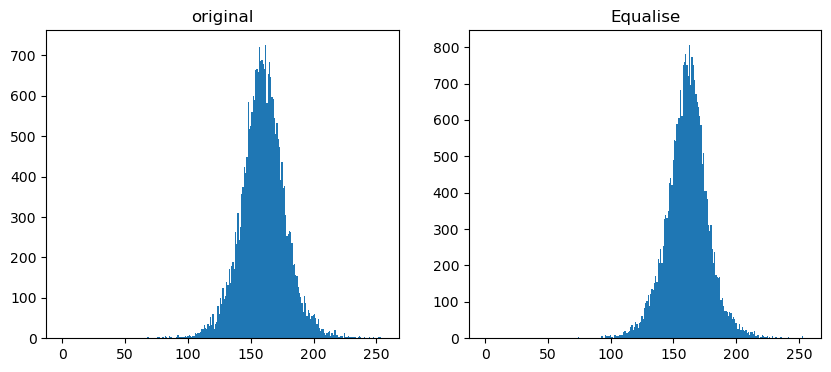

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(original.ravel(),bins=256,range=(0,255))
plt.title("original")
plt.subplot(1,2,2)
plt.hist(equalise.ravel(),bins=256,range=(0,255))
plt.title("Equalise")
plt.show()

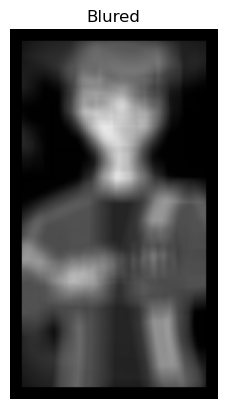

In [12]:
blur=np.ones((15,15),np.float32)/(225)
blured=np.zeros_like(img)
h,w=img_rgb.shape
off=15//2
for i in range(off,h-off):
    for j in range(off,w-off):
        region = img_rgb[i - off:i + off + 1, j - off:j + off + 1]
        blurr= np.sum(region * blur)
        blured[i,j]=np.clip(blurr,0,255)
plt.imshow(blured,cmap="gray")
plt.axis("off")
plt.title("Blured")
plt.show()

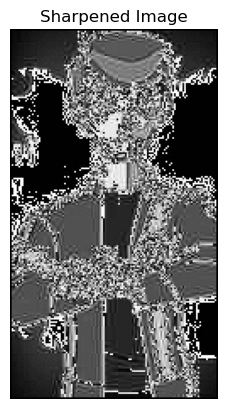

In [13]:
sharpen = np.array([[0, -1, 0], 
                    [-1,  5, -1], 
                    [0, -1, 0]], dtype=np.float32)
sharpened = np.zeros_like(img_rgb)
h, w= img_rgb.shape
off = 3//2
for i in range(off, h - off):
    for j in range(off, w - off):
        region = img_rgb[i - off:i + off + 1, j - off:j + off + 1]
        sharpened[i, j] = np.sum(region * sharpen) 
        sharpened[i, j] = np.clip(sharpened[i, j], 0, 255)  
plt.imshow(sharpened,cmap="gray")
plt.axis("off")
plt.title("Sharpened Image")
plt.show()

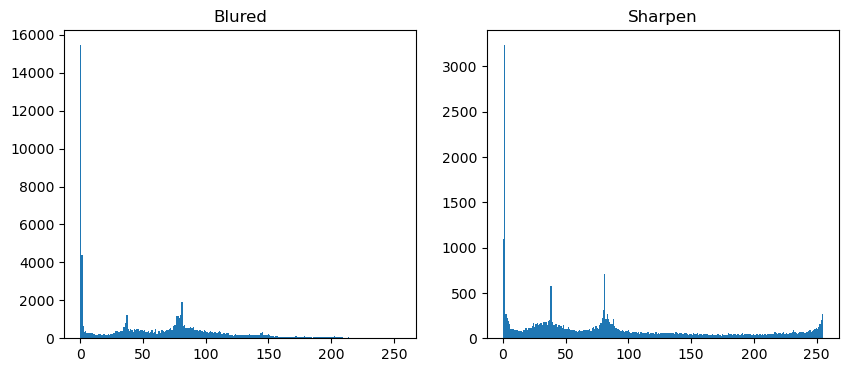

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(blured.ravel(),bins=256,range=(0,255))
plt.title("Blured")
plt.subplot(1,2,2)
plt.hist(sharpened.ravel(),bins=256,range=(0,255))
plt.title("Sharpen")
plt.show()

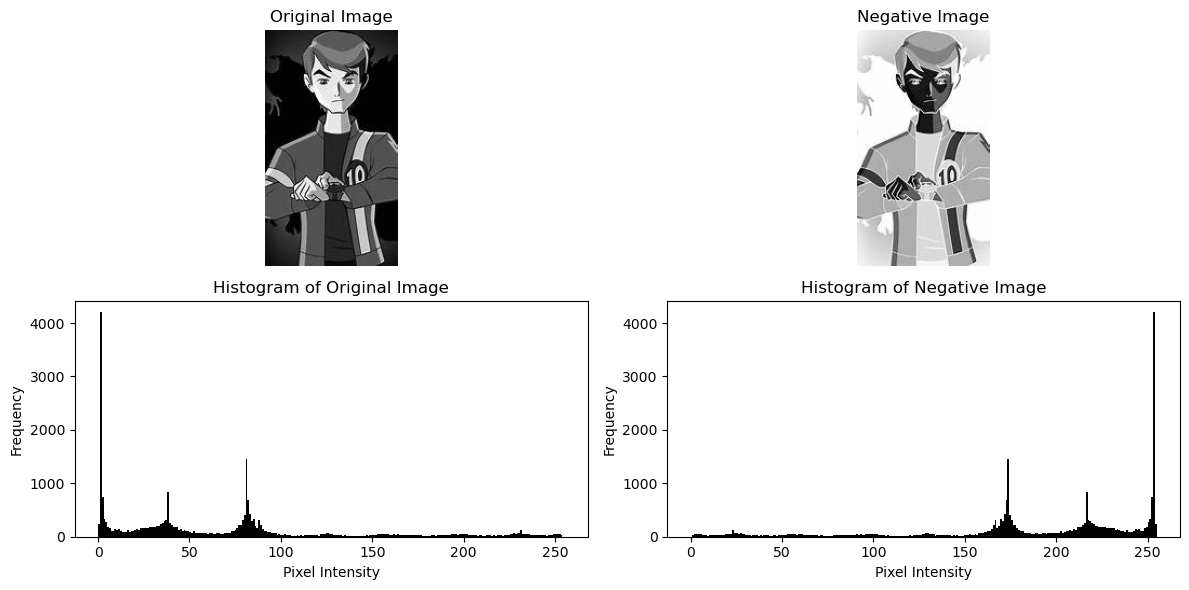

In [18]:
negative_image = 255 - img_rgb
plt.figure(figsize=(12, 6)) 
plt.subplot(2, 2, 1) 
plt.imshow(img_rgb, cmap="gray") 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(2, 2, 2) 
plt.imshow(negative_image, cmap="gray") 
plt.title("Negative Image") 
plt.axis("off") 
plt.subplot(2, 2, 3) 
plt.hist(img_rgb.ravel(), bins=256, color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(2, 2, 4) 
plt.hist(negative_image.ravel(), bins=256, color='black') 
plt.title("Histogram of Negative Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 

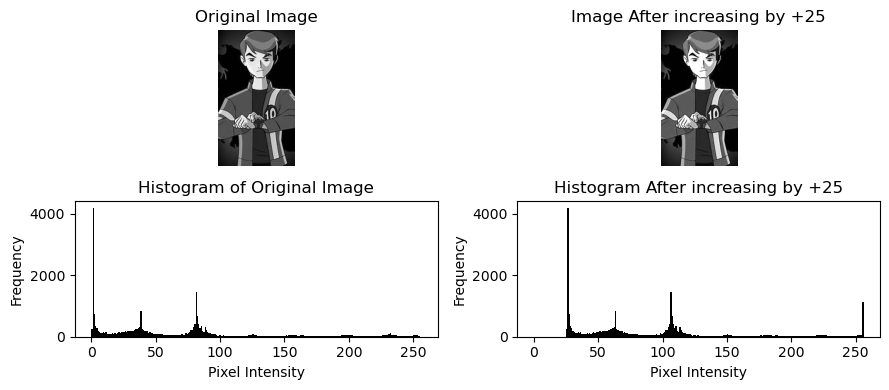

In [20]:
i2 = c.add(img_rgb, +25) 
plt.figure(figsize=(9, 4)) 
plt.subplot(221) 
plt.imshow(img_rgb, cmap='gray') 
plt.axis('off') 
plt.title("Original Image") 
plt.subplot(222) 
plt.imshow(i2, cmap='gray') 
plt.axis('off') 
plt.title("Image After increasing by +25") 
plt.subplot(223) 
plt.hist(img_rgb.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(224) 
plt.hist(i2.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram After increasing by +25") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 

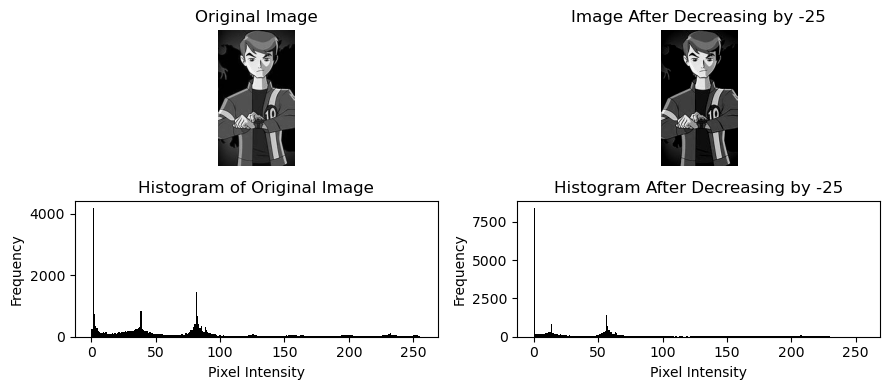

In [21]:
i2 = c.add(img_rgb, -25) 
plt.figure(figsize=(9, 4)) 
plt.subplot(221) 
plt.imshow(img_rgb, cmap='gray') 
plt.axis('off') 
plt.title("Original Image") 
plt.subplot(222) 
plt.imshow(i2, cmap='gray') 
plt.axis('off') 
plt.title("Image After Decreasing by -25") 
plt.subplot(223) 
plt.hist(img_rgb.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(224) 
plt.hist(i2.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram After Decreasing by -25") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 

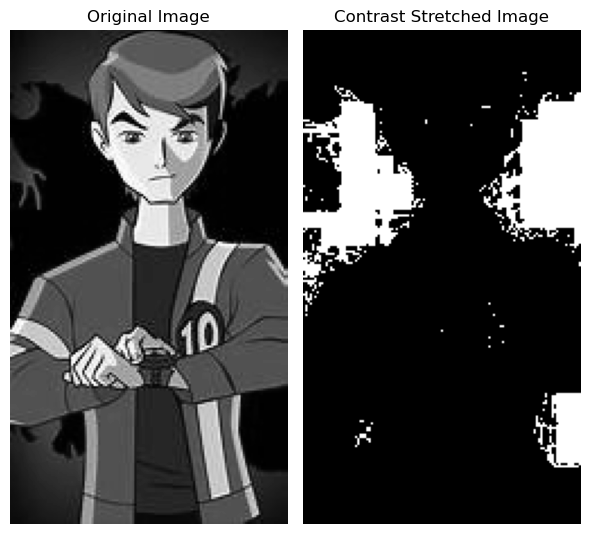

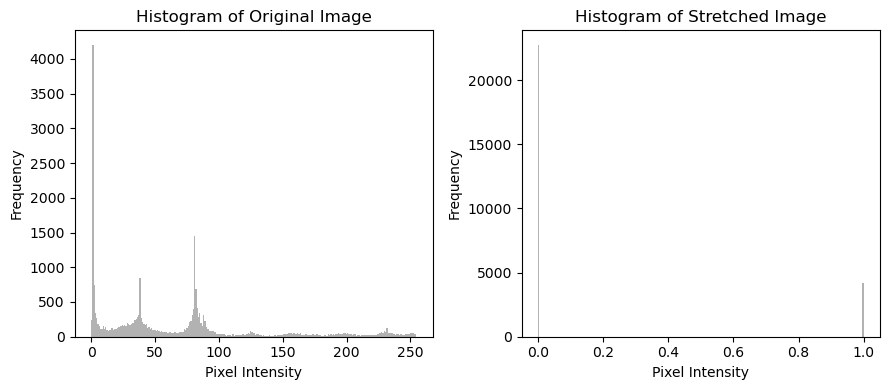

In [23]:
I_min = np.min(img_rgb) 
I_max = np.max(img_rgb) 
stretched_image = np.clip(((img_rgb - I_min) * 255) / (I_max - I_min), 0, 255).astype(np.uint8) 
plt.figure(figsize=(6, 6)) 
plt.subplot(1, 2, 1) 
plt.imshow(img_rgb, cmap='gray') 
plt.title('Original Image') 
plt.axis('off') 
plt.subplot(1, 2, 2) 
plt.imshow(stretched_image, cmap='gray') 
plt.title('Contrast Stretched Image') 
plt.axis('off') 
plt.tight_layout() 
plt.show() 
plt.figure(figsize=(9,4)) 
plt.subplot(1, 2, 1) 
plt.hist(img_rgb.flatten(), bins=256, color='gray', alpha=0.6) 
plt.title('Histogram of Original Image') 
plt.xlabel('Pixel Intensity') 
plt.ylabel('Frequency') 
plt.subplot(1, 2, 2) 
plt.hist(stretched_image.flatten(), bins=256, color='gray', alpha=0.6) 
plt.title('Histogram of Stretched Image') 
plt.xlabel('Pixel Intensity') 
plt.ylabel('Frequency') 
plt.tight_layout() 
plt.show() 

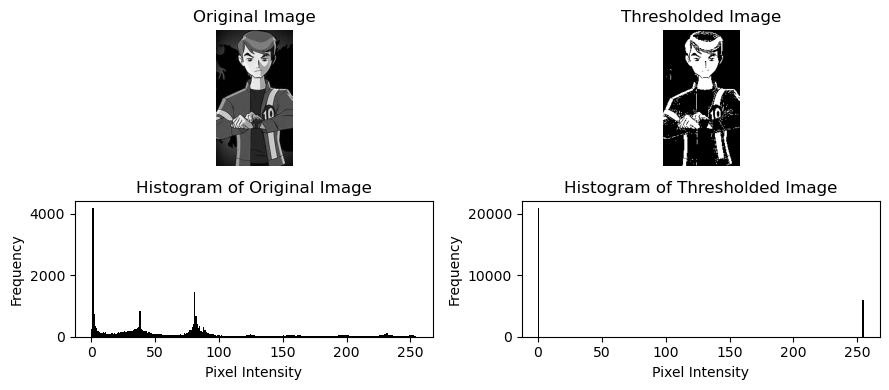

In [25]:
val, t = c.threshold(img_rgb, 90, 255, c.THRESH_BINARY) 
plt.figure(figsize=(9, 4)) 
plt.subplot(2, 2, 1) 
plt.imshow(img_rgb, cmap="gray") 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(2, 2, 2) 
plt.imshow(t, cmap="gray") 
plt.title("Thresholded Image") 
plt.axis("off") 
plt.subplot(2, 2, 3) 
plt.hist(img_rgb.ravel(), bins=256, color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(2, 2, 4) 
plt.hist(t.ravel(), bins=256, color='black') 
plt.title("Histogram of Thresholded Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 

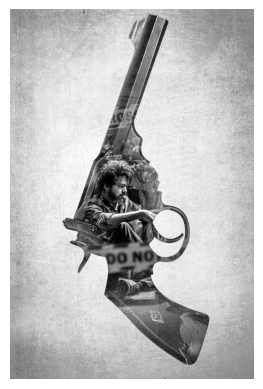

(1800, 1186, 3)

In [27]:
import cv2 as c
import matplotlib.pyplot as plt 
import numpy as np
img=c.imread("leo.jpg")
img_rgb=c.cvtColor(img,c.COLOR_BGR2GRAY)
plt.imshow(img_rgb,cmap="gray")
plt.axis("off")
plt.show()
img.shape

In [28]:
def bright_dim(img,x):
    h,w=img.shape
    img2=np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            img2[i,j]=np.clip(img[i,j]+x,0,255)
    return img2            

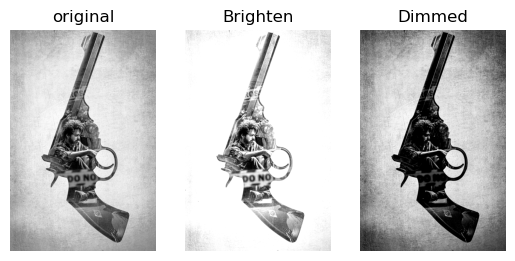

In [31]:
bright_img=bright_dim(img_rgb,100)
dim=bright_dim(img_rgb,-100)
plt.subplot(1,3,1)
plt.imshow(img_rgb,cmap="gray")
plt.axis("off")
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(bright_img,cmap="gray")
plt.axis("off")
plt.title("Brighten")
plt.subplot(1,3,3)
plt.imshow(dim,cmap="gray")
plt.axis("off")
plt.title("Dimmed")
plt.show()

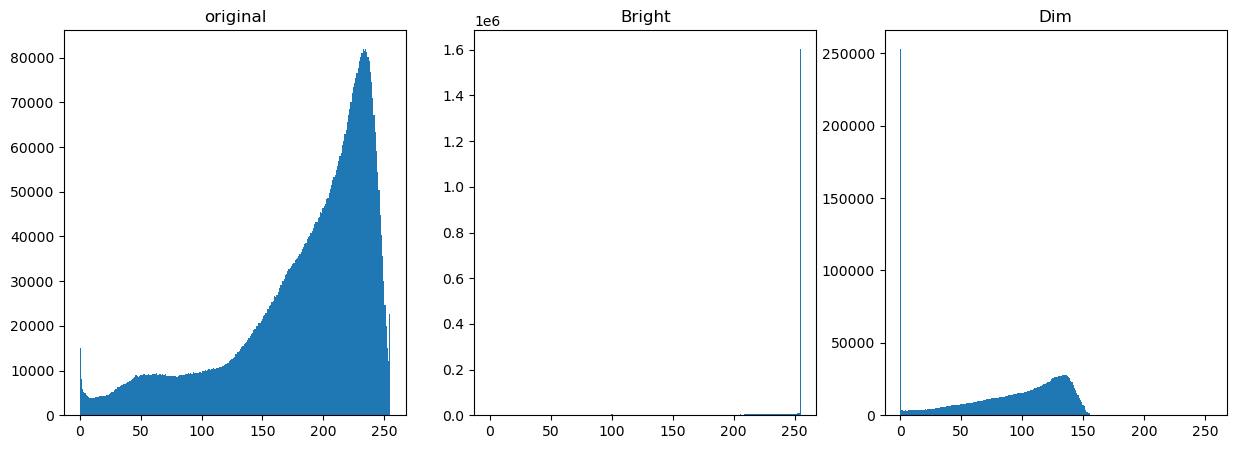

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(img.ravel(),bins=256,range=(0,255))
plt.title("original")
plt.subplot(1,3,2)
plt.hist(bright_img.ravel(),bins=256,range=(0,255))
plt.title("Bright")
plt.subplot(1,3,3)
plt.hist(dim.ravel(),bins=256,range=(0,255))
plt.title("Dim")
plt.show()

In [33]:
img_eq=c.equalizeHist(img_rgb)

In [34]:
def DFT(img):
    dft=np.fft.fft2(img)
    dft_shift=np.fft.fftshift(dft)
    mg=20*np.log(np.abs(dft_shift))
    return mg

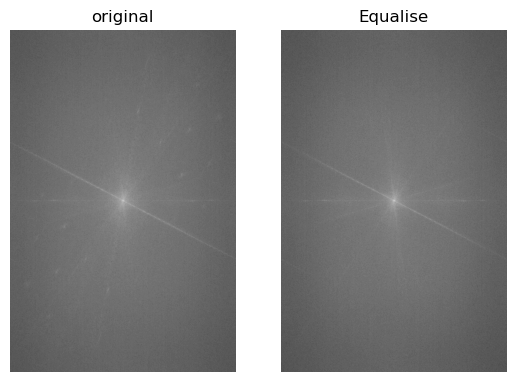

In [35]:
original=DFT(img_rgb)
equalise=DFT(img_eq)
plt.subplot(1,2,1)
plt.imshow(original,cmap="gray")
plt.axis("off")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(equalise,cmap="gray")
plt.axis("off")
plt.title("Equalise")
plt.show()

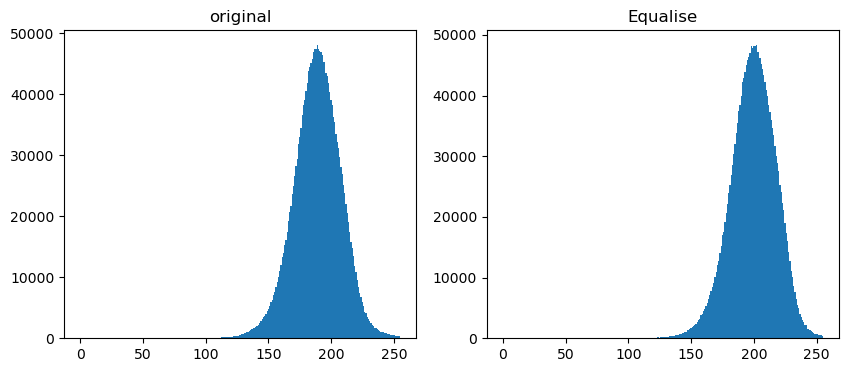

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(original.ravel(),bins=256,range=(0,255))
plt.title("original")
plt.subplot(1,2,2)
plt.hist(equalise.ravel(),bins=256,range=(0,255))
plt.title("Equalise")
plt.show()

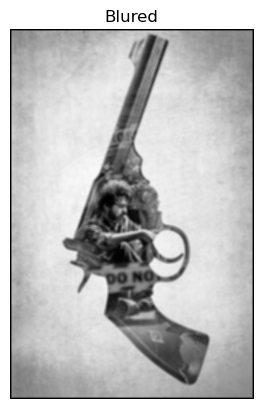

In [37]:
blur=np.ones((15,15),np.float32)/(225)
blured=np.zeros_like(img)
h,w=img_rgb.shape
off=15//2
for i in range(off,h-off):
    for j in range(off,w-off):
        region = img_rgb[i - off:i + off + 1, j - off:j + off + 1]
        blurr= np.sum(region * blur)
        blured[i,j]=np.clip(blurr,0,255)
plt.imshow(blured,cmap="gray")
plt.axis("off")
plt.title("Blured")
plt.show()

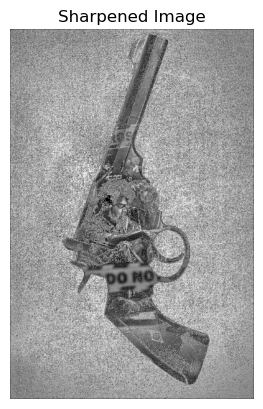

In [38]:
sharpen = np.array([[0, -1, 0], 
                    [-1,  5, -1], 
                    [0, -1, 0]], dtype=np.float32)
sharpened = np.zeros_like(img_rgb)
h, w= img_rgb.shape
off = 3//2
for i in range(off, h - off):
    for j in range(off, w - off):
        region = img_rgb[i - off:i + off + 1, j - off:j + off + 1]
        sharpened[i, j] = np.sum(region * sharpen) 
        sharpened[i, j] = np.clip(sharpened[i, j], 0, 255)  
plt.imshow(sharpened,cmap="gray")
plt.axis("off")
plt.title("Sharpened Image")
plt.show()

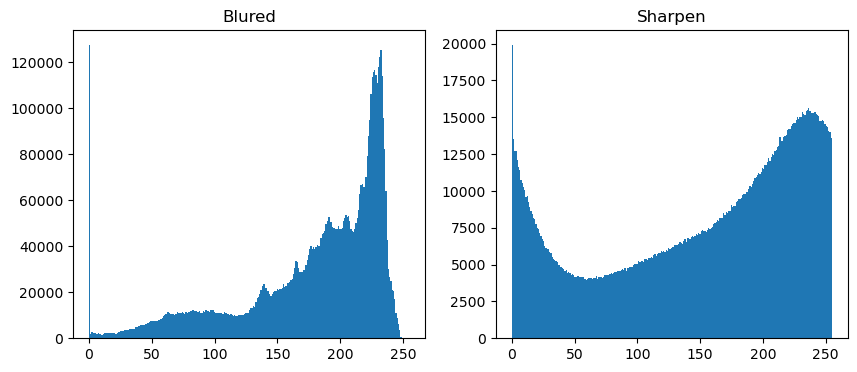

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(blured.ravel(),bins=256,range=(0,255))
plt.title("Blured")
plt.subplot(1,2,2)
plt.hist(sharpened.ravel(),bins=256,range=(0,255))
plt.title("Sharpen")
plt.show()

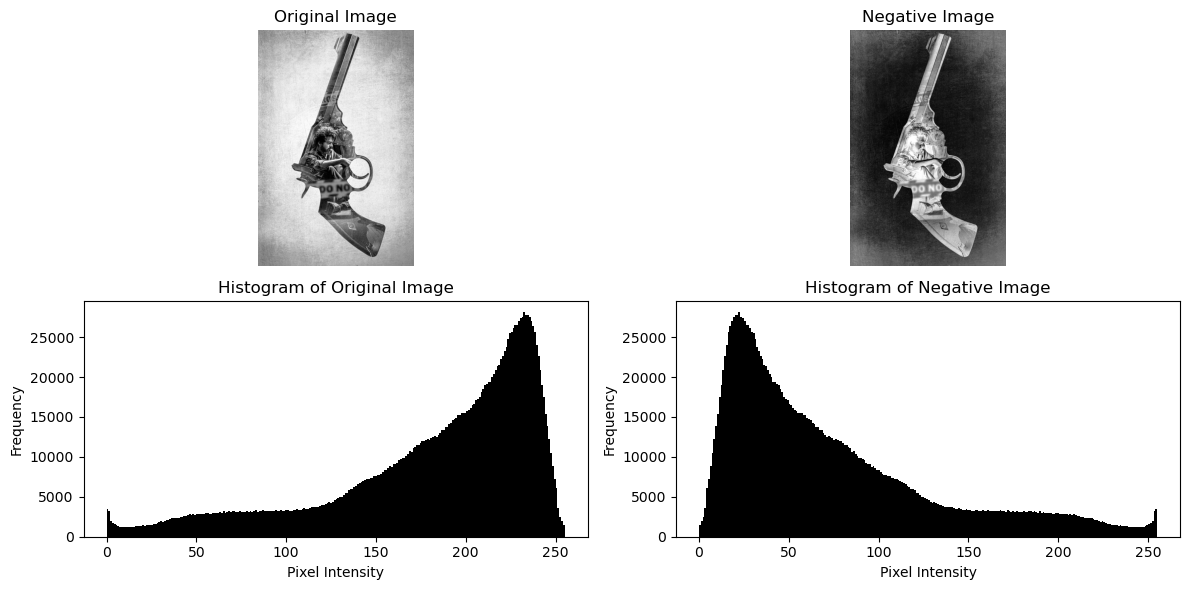

In [40]:
negative_image = 255 - img_rgb
plt.figure(figsize=(12, 6)) 
plt.subplot(2, 2, 1) 
plt.imshow(img_rgb, cmap="gray") 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(2, 2, 2) 
plt.imshow(negative_image, cmap="gray") 
plt.title("Negative Image") 
plt.axis("off") 
plt.subplot(2, 2, 3) 
plt.hist(img_rgb.ravel(), bins=256, color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(2, 2, 4) 
plt.hist(negative_image.ravel(), bins=256, color='black') 
plt.title("Histogram of Negative Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 

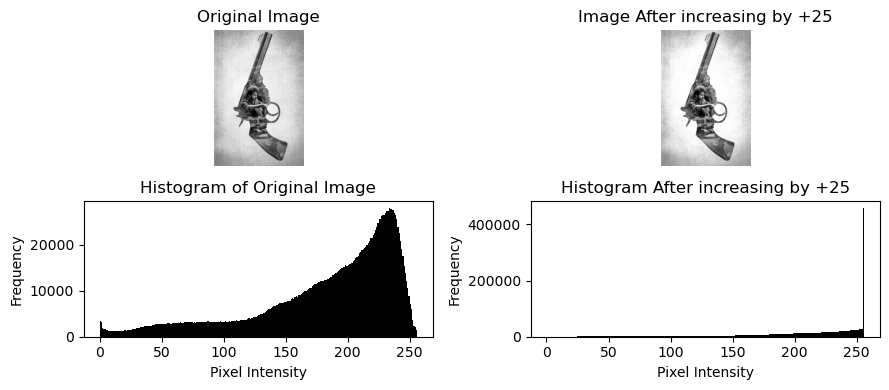

In [41]:
i2 = c.add(img_rgb, +25) 
plt.figure(figsize=(9, 4)) 
plt.subplot(221) 
plt.imshow(img_rgb, cmap='gray') 
plt.axis('off') 
plt.title("Original Image") 
plt.subplot(222) 
plt.imshow(i2, cmap='gray') 
plt.axis('off') 
plt.title("Image After increasing by +25") 
plt.subplot(223) 
plt.hist(img_rgb.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(224) 
plt.hist(i2.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram After increasing by +25") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 

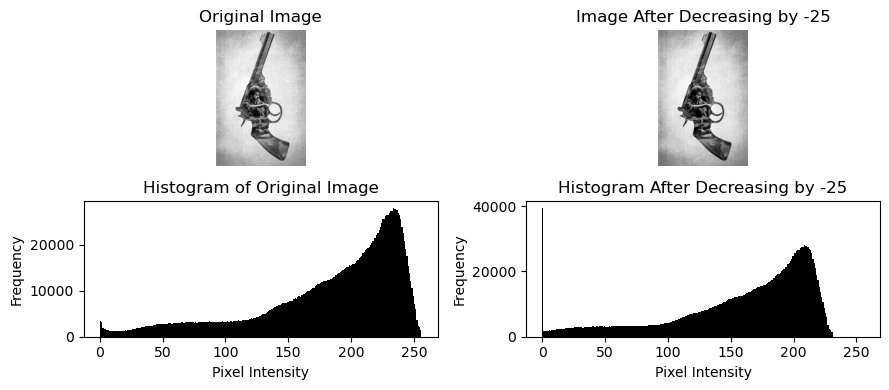

In [42]:
i2 = c.add(img_rgb, -25) 
plt.figure(figsize=(9, 4)) 
plt.subplot(221) 
plt.imshow(img_rgb, cmap='gray') 
plt.axis('off') 
plt.title("Original Image") 
plt.subplot(222) 
plt.imshow(i2, cmap='gray') 
plt.axis('off') 
plt.title("Image After Decreasing by -25") 
plt.subplot(223) 
plt.hist(img_rgb.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(224) 
plt.hist(i2.ravel(), bins=256, range=[0, 256], color='black') 
plt.title("Histogram After Decreasing by -25") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 

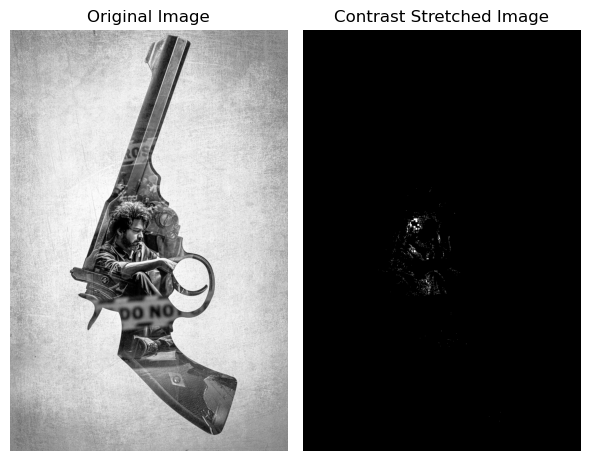

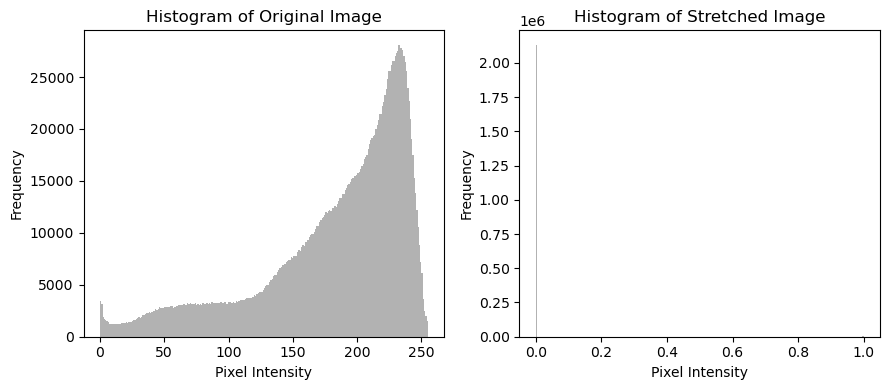

In [43]:
I_min = np.min(img_rgb) 
I_max = np.max(img_rgb) 
stretched_image = np.clip(((img_rgb - I_min) * 255) / (I_max - I_min), 0, 255).astype(np.uint8) 
plt.figure(figsize=(6, 6)) 
plt.subplot(1, 2, 1) 
plt.imshow(img_rgb, cmap='gray') 
plt.title('Original Image') 
plt.axis('off') 
plt.subplot(1, 2, 2) 
plt.imshow(stretched_image, cmap='gray') 
plt.title('Contrast Stretched Image') 
plt.axis('off') 
plt.tight_layout() 
plt.show() 
plt.figure(figsize=(9,4)) 
plt.subplot(1, 2, 1) 
plt.hist(img_rgb.flatten(), bins=256, color='gray', alpha=0.6) 
plt.title('Histogram of Original Image') 
plt.xlabel('Pixel Intensity') 
plt.ylabel('Frequency') 
plt.subplot(1, 2, 2) 
plt.hist(stretched_image.flatten(), bins=256, color='gray', alpha=0.6) 
plt.title('Histogram of Stretched Image') 
plt.xlabel('Pixel Intensity') 
plt.ylabel('Frequency') 
plt.tight_layout() 
plt.show() 

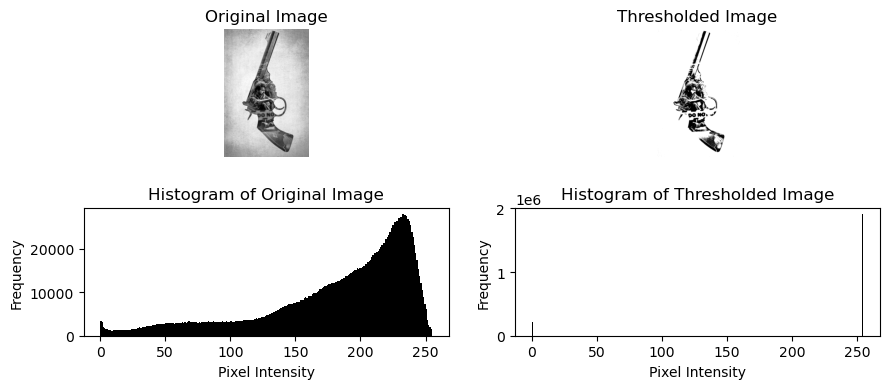

In [44]:
val, t = c.threshold(img_rgb, 90, 255, c.THRESH_BINARY) 
plt.figure(figsize=(9, 4)) 
plt.subplot(2, 2, 1) 
plt.imshow(img_rgb, cmap="gray") 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(2, 2, 2) 
plt.imshow(t, cmap="gray") 
plt.title("Thresholded Image") 
plt.axis("off") 
plt.subplot(2, 2, 3) 
plt.hist(img_rgb.ravel(), bins=256, color='black') 
plt.title("Histogram of Original Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.subplot(2, 2, 4) 
plt.hist(t.ravel(), bins=256, color='black') 
plt.title("Histogram of Thresholded Image") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.tight_layout() 
plt.show() 